This notebook demonstrates how to perform first-level modeling.

Since the BIDS format does not standardize the structure for first-level data, the code provided here organizes the first-level results using a naming convention that facilitates subsequent analysis.

It assumes that the raw data follows the BIDS format, with derivatives stored in a nested structure under the derivatives folder within the BIDS data directory.

In [1]:
# Import funROI
import sys
import os
package_path = "../funROI"
sys.path.append(os.path.abspath(package_path))
import funROI
from funROI import utils, first_level, analysis

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the BIDS data directories
funROI.set_bids_data_folder("./data/bids")
funROI.set_bids_deriv_folder("./data/bids/derivatives")
funROI.set_bids_preprocessed_folder("./data/bids/derivatives/fmriprep")

# First level modeling using Nilearn

In [3]:
confound_labels = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
space = 'MNI152NLin2009cAsym'

In [4]:
first_level.run_first_level_nilearn(subjects = ['040'], tasks = ['EventsOrig', 'SWNloc'], confound_labels=confound_labels, space=space)
first_level.run_first_level_nilearn(subjects = ['199'], tasks = ['Events2move', 'langlocSN', 'spatialFIN'], confound_labels=confound_labels, space=space)

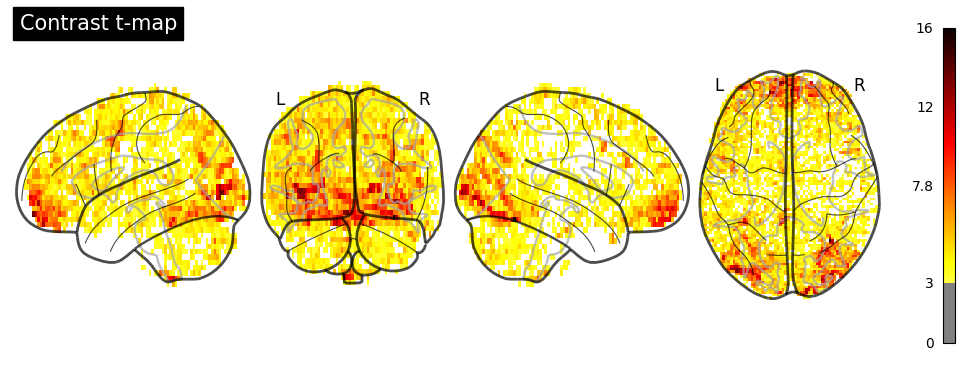

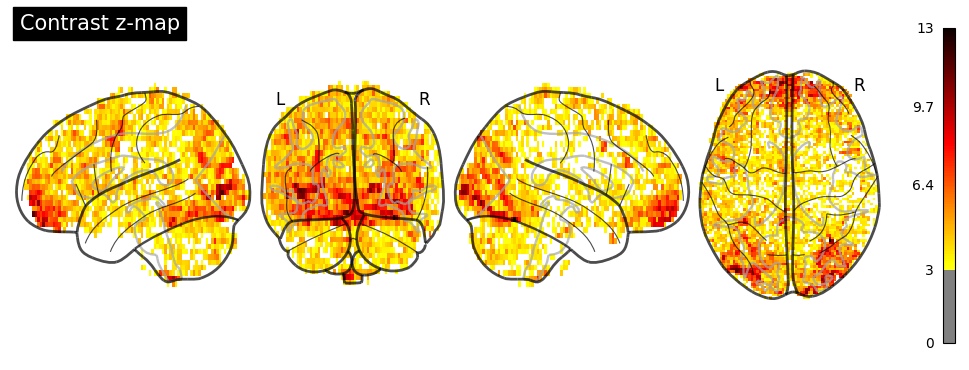

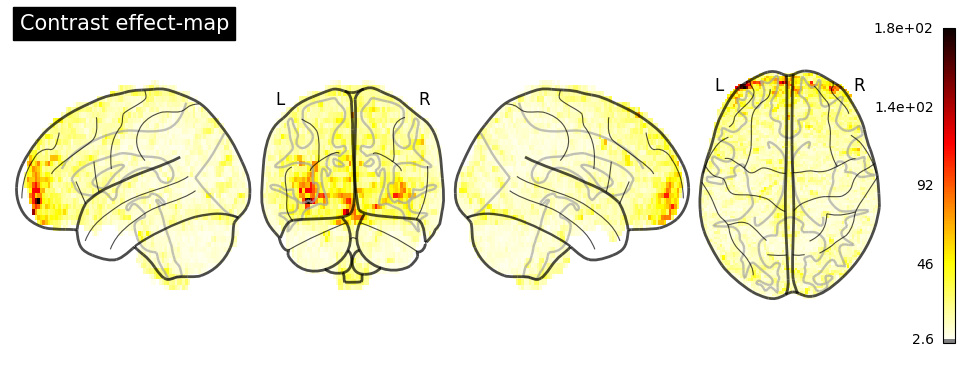

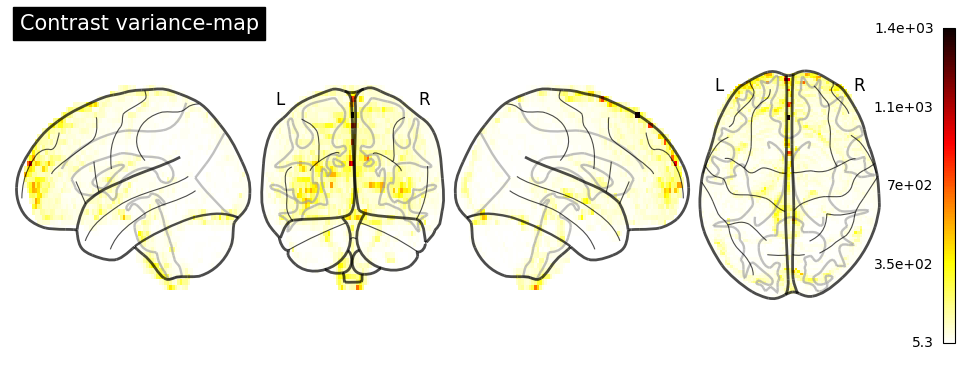

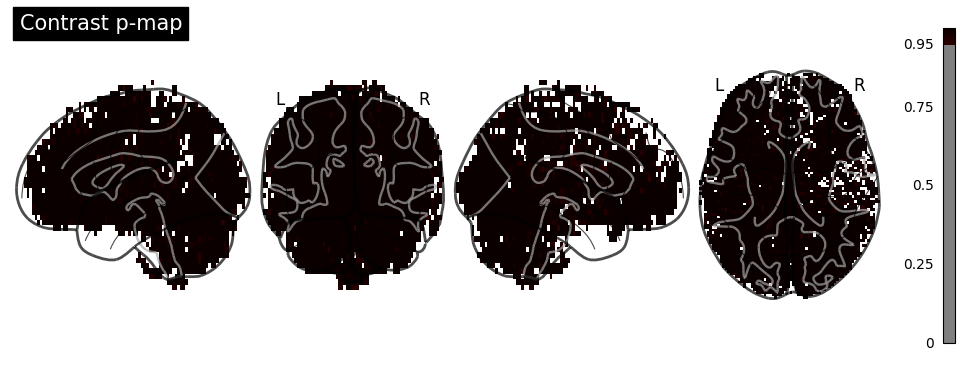

In [5]:
# To visualize basic contrasts
from nilearn.plotting import plot_glass_brain
from nilearn.image import math_img

subject = '040'
task = 'EventsOrig'
run = '1'
contrast = 'Sem_photo'

plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 't'), title='Contrast t-map', threshold=3, colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'z'), title='Contrast z-map', threshold=3, colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'effect'), title='Contrast effect-map', colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'variance'), title='Contrast variance-map', colorbar=True, display_mode='lyrz')

# p: use 1 - p for the ease of visualization
p_map = utils.get_contrast(subject, task, run, contrast, 'p')
one_minus_p_map = math_img('1 - img', img=p_map)
plot_glass_brain(one_minus_p_map, title='Contrast p-map', threshold=0.95, colorbar=True, display_mode='lyrz')



<Axes: >

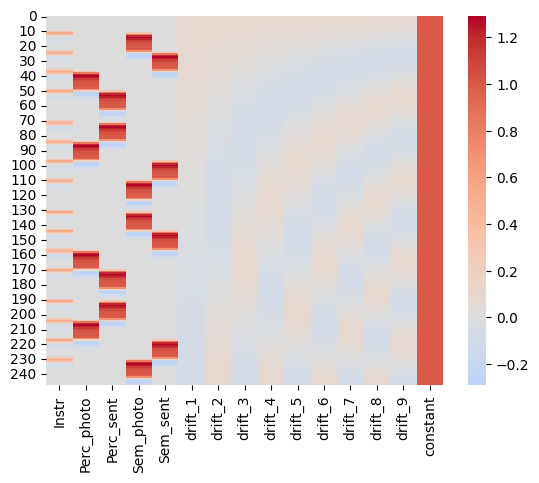

In [6]:
# Visualize design matrix
import seaborn as sns

subject = '040'
task = 'EventsOrig'
run = '1'

design_matrix = utils.get_design_matrix(subject, task, run)
# Remove confounders because they are in large scale
design_matrix = design_matrix.drop(confound_labels, axis=1)
sns.heatmap(design_matrix, cmap='coolwarm', center=0)

In addition to basic contrasts, custom contrast configurations can be added and incorporated into subsequent analyses.

In [7]:
# Register a new contrast
new_contrast_name = 'Sem_sent_minus_Perc_sent'
new_contrast_design = [0, 0, -1, 0, 1]  # corresponding to instr, perc_photo, perc_sent, sem_photo, sem_sent; others 0 by default
utils.register_contrast(subject, task, new_contrast_name, new_contrast_design)

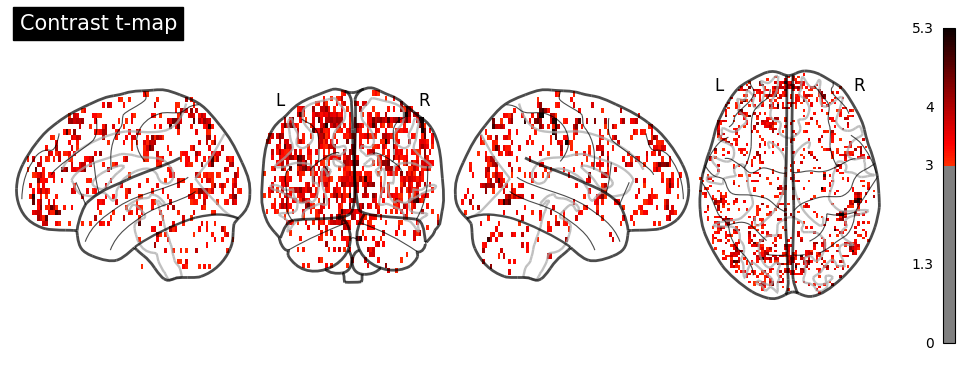

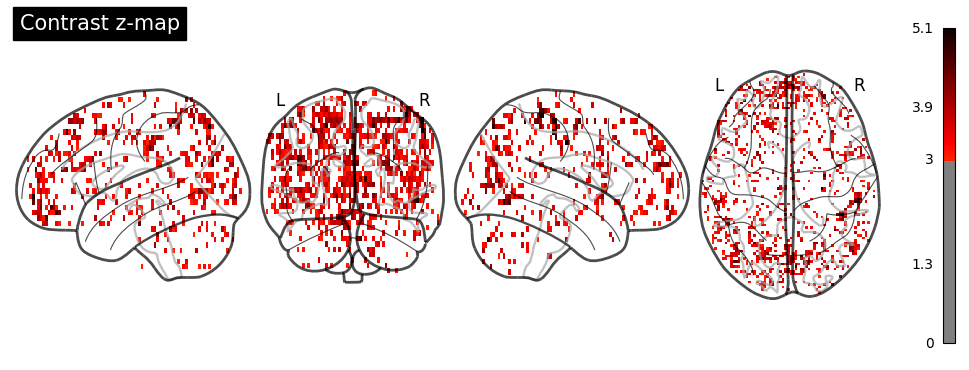

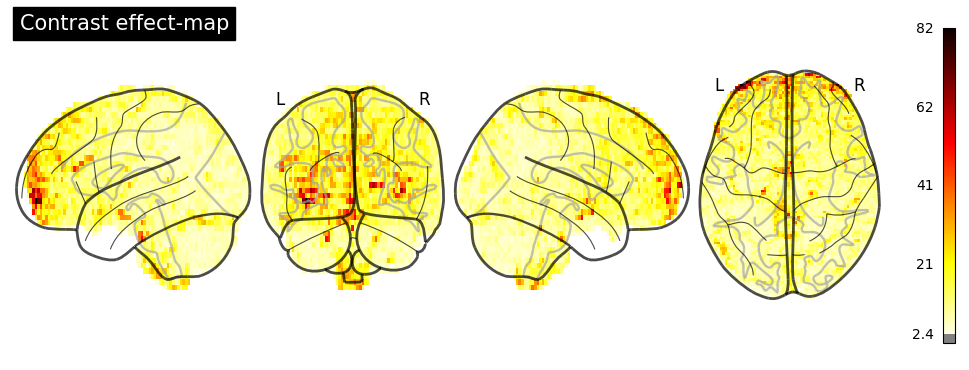

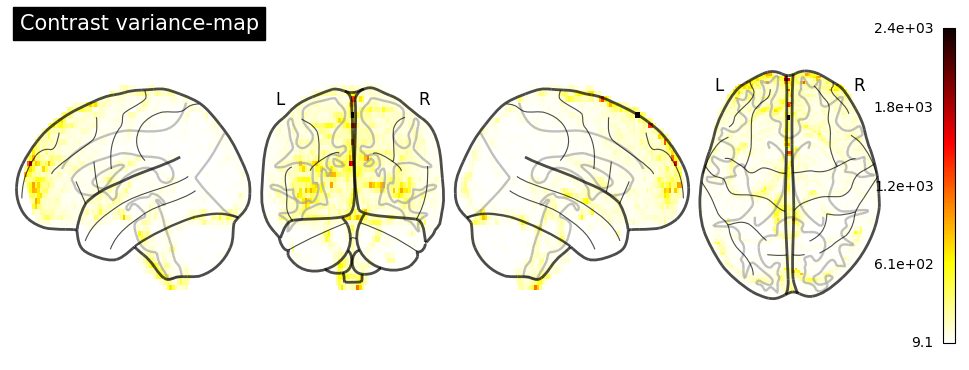

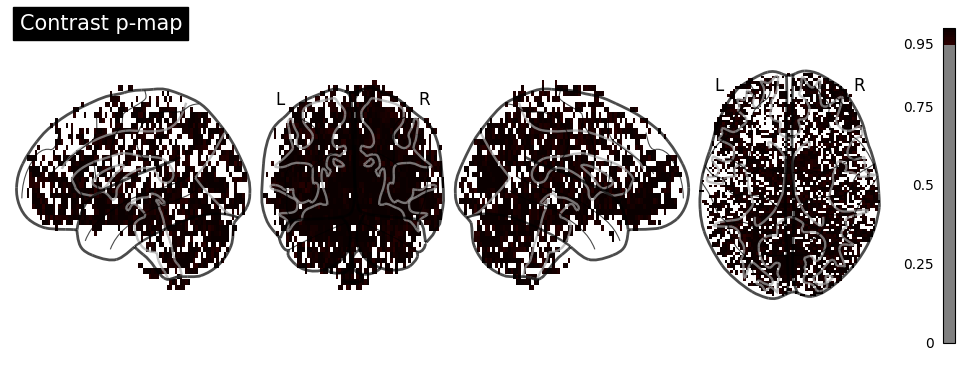

In [8]:
plot_glass_brain(utils.get_contrast(subject, task, run, new_contrast_name, 't', create_if_not_exist=True), title='Contrast t-map', threshold=3, colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, new_contrast_name, 'z', create_if_not_exist=True), title='Contrast z-map', threshold=3, colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, new_contrast_name, 'effect', create_if_not_exist=True), title='Contrast effect-map', colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, new_contrast_name, 'variance', create_if_not_exist=True), title='Contrast variance-map', colorbar=True, display_mode='lyrz')

# p
p_map = utils.get_contrast(subject, task, run, new_contrast_name, 'p', create_if_not_exist=True)
one_minus_p_map = math_img('1 - img', img=p_map)
plot_glass_brain(one_minus_p_map, title='Contrast p-map', threshold=0.95, colorbar=True, display_mode='lyrz')

# Migrate SPM First Level Results

Although the code mainly supports Nilearn's first-level modeling, a helper function is provided to migrate data from an SPM first-level contrast results folder to the BIDS dataset. It is assumed, however, that all contrasts have been pre-computed in SPM.

In [9]:
spm_data_dir = './data/spm_first_level_results'
first_level.migrate_first_level_from_spm(os.path.join(spm_data_dir, '040_EventsOrig_instrsep_2runs'), '040', 'EventsOrig')
first_level.migrate_first_level_from_spm(os.path.join(spm_data_dir, '040_SWNlocIPS168_2runs'), '040', 'SWNloc')
first_level.migrate_first_level_from_spm(os.path.join(spm_data_dir, '199_Events2move_instrsep'), '199', 'Events2move')
first_level.migrate_first_level_from_spm(os.path.join(spm_data_dir, '199_langlocSN'), '199', 'langlocSN')
first_level.migrate_first_level_from_spm(os.path.join(spm_data_dir, '199_spatialFIN'), '199', 'spatialFIN')

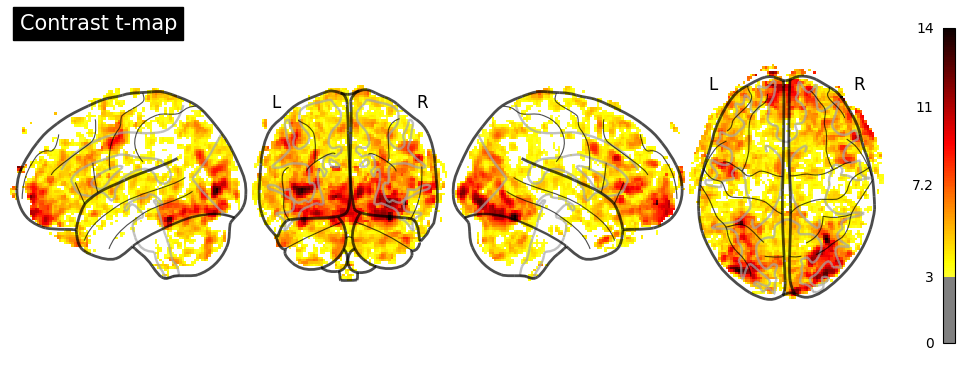

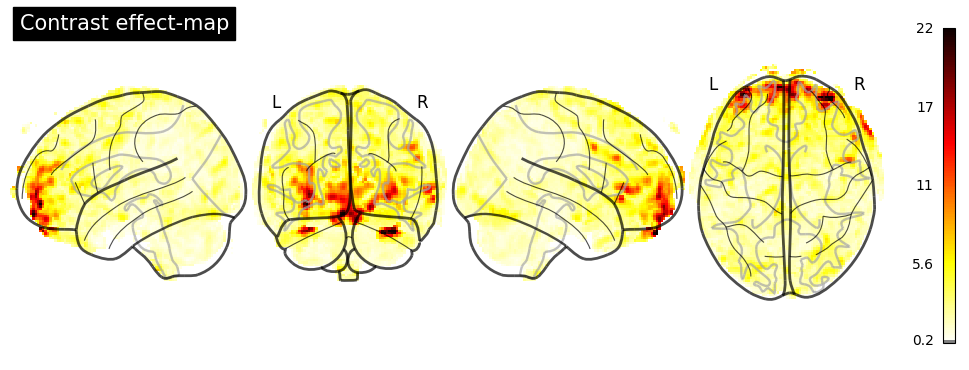

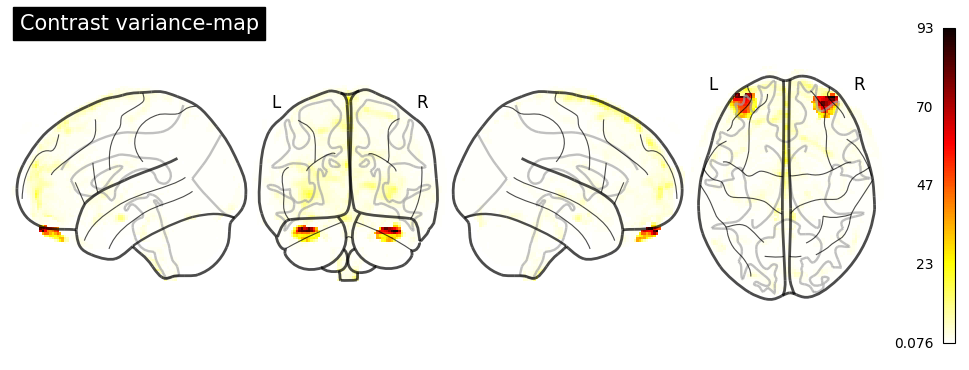

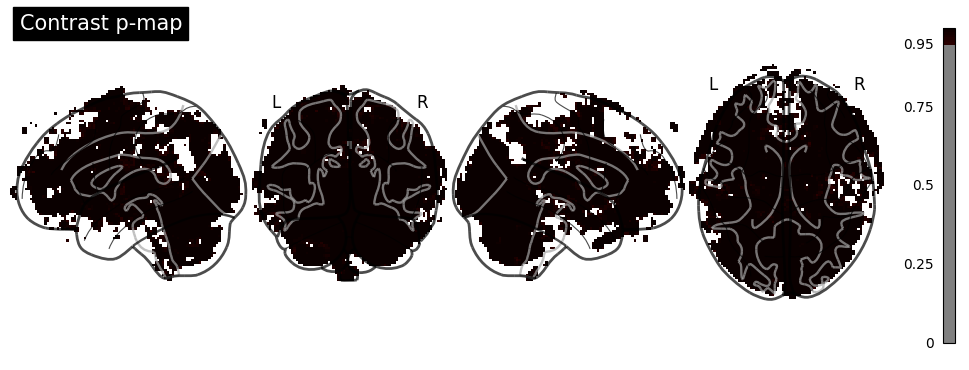

In [10]:
from nilearn.plotting import plot_glass_brain
from nilearn.image import math_img

subject = '040'
task = 'EventsOrig'
run = '1'
contrast = 'Sem_photo'

plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 't'), title='Contrast t-map', threshold=3, colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'effect'), title='Contrast effect-map', colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'variance'), title='Contrast variance-map', colorbar=True, display_mode='lyrz')

# p
p_map = utils.get_contrast(subject, task, run, contrast, 'p')
one_minus_p_map = math_img('1 - img', img=p_map)
plot_glass_brain(one_minus_p_map, title='Contrast p-map', threshold=0.95, colorbar=True, display_mode='lyrz')

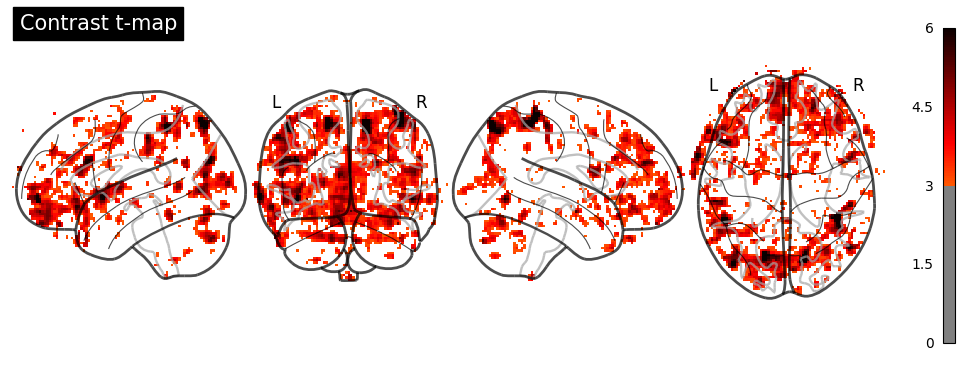

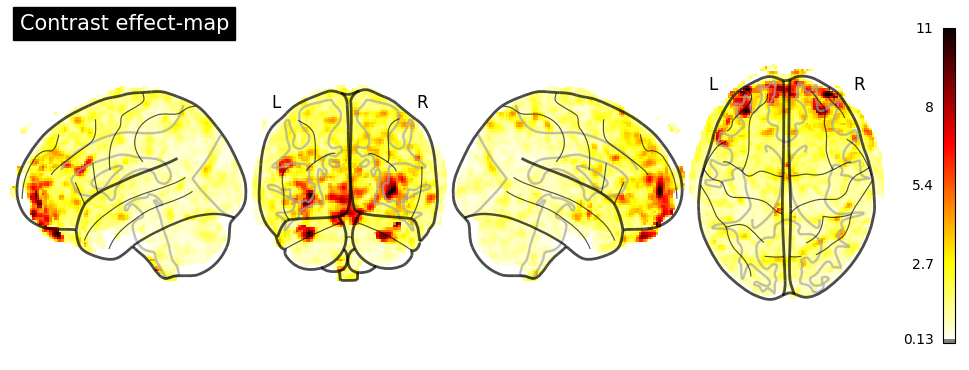

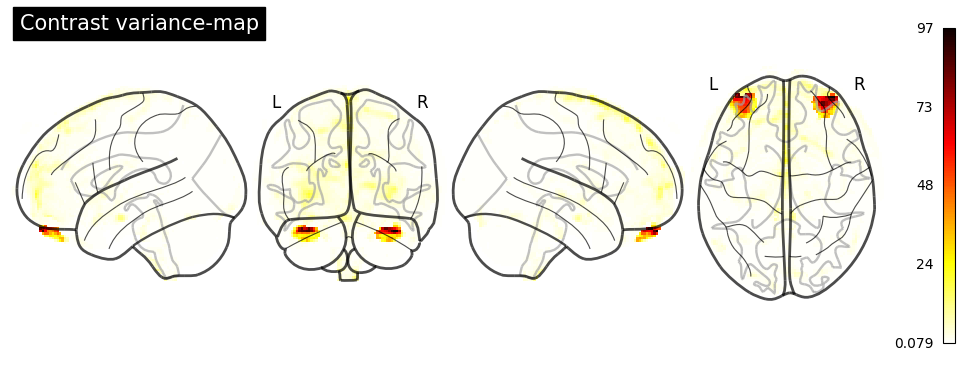

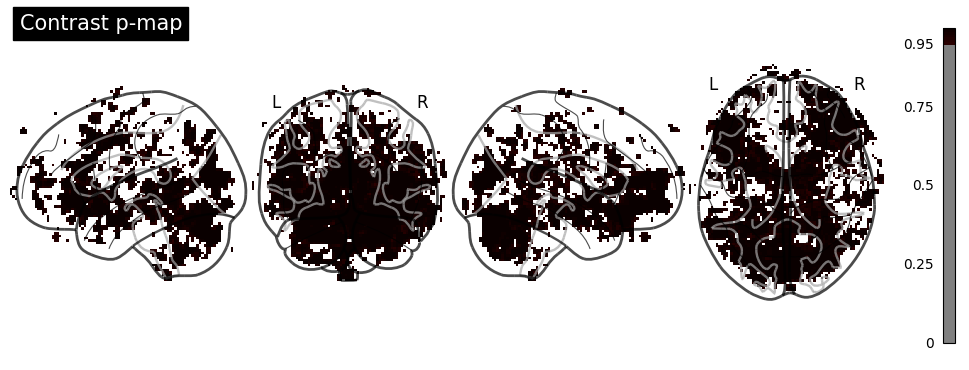

In [11]:
contrast = 'Sent_Sem-Perc'

plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 't'), title='Contrast t-map', threshold=3, colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'effect'), title='Contrast effect-map', colorbar=True, display_mode='lyrz')
plot_glass_brain(utils.get_contrast(subject, task, run, contrast, 'variance'), title='Contrast variance-map', colorbar=True, display_mode='lyrz')

# p
p_map = utils.get_contrast(subject, task, run, contrast, 'p')
one_minus_p_map = math_img('1 - img', img=p_map)
plot_glass_brain(one_minus_p_map, title='Contrast p-map', threshold=0.95, colorbar=True, display_mode='lyrz')